<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Introduction_to_Statistical_Learning/DataStory_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse Advertising Data
## Ask Questions
General | Specific
--- | ---
Can we determine if a relationship exists between predictors and response? | (1) Is there a relationship between advertising budget and sales?
How strong is this relationship? | (2) How strong is the relationship between advertising budget and sales?
Which predictors are related to response? | (3) Which media are associated with sales?
How large is the association between each predictor and response? | (4) How large is the association between each medium and sales?
How accurate are predictions once model is fit? | (5) How accurately can we predict future sales?
Is a linear model appropriate? | (6) Is the relationship linear?
Are there interaction effects? | (7) Is there synergy among the advertising media?

## Wrangle Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from numpy.polynomial import Polynomial
import statsmodels.formula.api as smf

In [2]:
path = 'https://raw.githubusercontent.com/tdpetrou/Machine-Learning-Books-With-Python/master/Introduction%20to%20Statistical%20Learning/data/'
adv = pd.read_csv(path+'Advertising.csv')
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


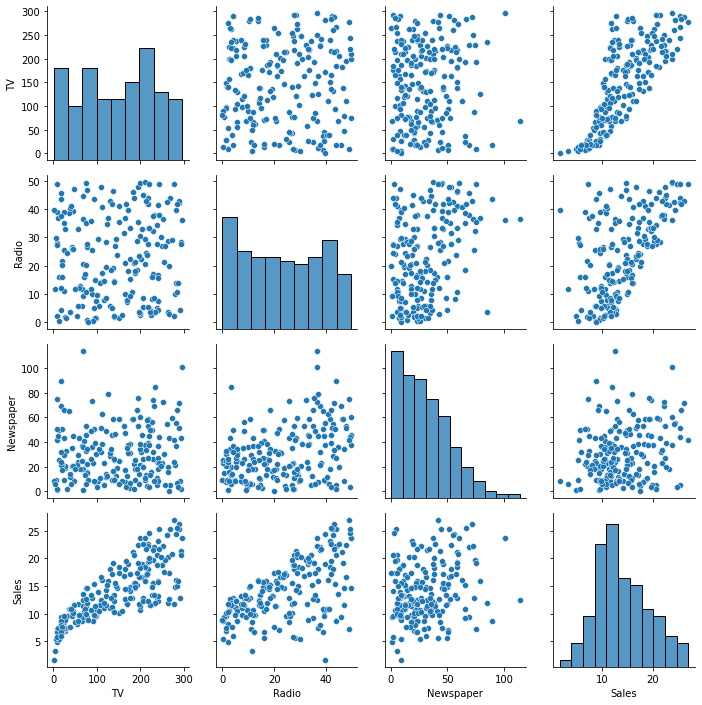

In [3]:
# Plot pairwise data relationships
g = sns.PairGrid(adv)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

## Explore Data
### Simple Regression

**Regress $\text{Sales}$ onto $\text{TV}$** by fitting the model
$\text{Sales} \approx \beta_0 + \beta_1 \times \text{TV}$.

In [4]:
# Use R-style formulas with formula.api
lm = smf.ols('Sales ~ TV', data=adv).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        06:49:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [5]:
def get_RSE(lm):
  """Calculate Residual Standard Error and print results."""
  RSE = np.sqrt(np.power(lm.resid, 2).sum()/lm.df_resid)
  # where:
  #   lm.resid is a vector of residuals
  #   lm.df_resid is a degree of freedom of residuals, i.e. n-2 (lm.nobs - 2)  
  print(f'RSE = {RSE:.2f} and mean(Sales) = {adv.Sales.mean():.3f} units,')
  print(f'and so the percentage error RSE/mean(Sales) is {RSE/adv.Sales.mean():.0%}.')

get_RSE(lm)

RSE = 3.26 and mean(Sales) = 14.023 units,
and so the percentage error RSE/mean(Sales) is 23%.


(Ref ISL Table 3.1) Coefficients of the least squares model for the regression of number of units sold on TV advertising budget. An increase of $1,000 in the TV advertising budget is associated with an increase in sales by around 50 units.

(Ref ISL Table 3.2) The **Residual Standard Error** (RSE, a measure of the *lack of fit* of the model) is 3.26. In other words, actual sales in each market deviate for the true regression line by approximately 3.26 units, on average.

The **$R^2$ statistic** (the proportion of variability in *Sales* that can be explained by linear regression on *TV*) is 0.61 (just under two-third).



**Regress $\text{Sales}$ onto $\text{Radio}$** by fitting the model
$\text{Sales} \approx \beta_0 + \beta_1 \times \text{Radio}$.

In [6]:
# Regress Sales onto Radio
lm = smf.ols('Sales ~ Radio', data=adv).fit()
print(lm.summary(), '\n')
get_RSE(lm)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           4.35e-19
Time:                        06:49:29   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

(Ref ISL Table 3.3) More simple linear regression models for the `Advertising` data. A $1,000 increase in spending on radio advertising is associated with an average increase in sales by around 203 units, while the same increase in spending on newspaper advertising is associated with an average increse in sales by around 55 units.

**Regress $\text{Sales}$ onto $\text{Newspaper}$** by fitting the model
$\text{Sales} \approx \beta_0 + \beta_1 \times \text{Newspaper}$.

In [7]:
# Regress Sales onto Newspaper
lm = smf.ols('Sales ~ Newspaper', data=adv).fit()
print(lm.summary(), '\n')
get_RSE(lm)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 26 Oct 2021   Prob (F-statistic):            0.00115
Time:                        06:49:29   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

### Multiple Regression
We can run three separate simple linear regressions, each of which uses a different advertising medium as a predictor. See the sub-chapter above. However, the approach of fitting a separate simple linear regression model for each predictor is not entirely satisfactory:
- It is unclear how to make a single prediction of sales given the three advertising media budgets, since each of the budgets is associated with a separate regression equation.
- Each of the three regression equations ignores the other two media in forming estimates for the regression coefficients. If the media budgets are correlated with each other in the 200 markets in our data set, then this can lead to very misleading estimates of the association between each media budget and sales.

Instead of fitting a separate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model $(3.5)$ so that it can directly accomodate multiple predictors. We can do this by giving each predictor a separate slope coefficient in a single model:
$$\text{Sales} = \beta_0 + \beta_{TV}\times\text{TV} + \beta_{Radio}\times\text{Radio} + \beta_{Newpaper}\times\text{Newspaper} + \epsilon,\qquad(20)$$ 

In [8]:
lm = smf.ols('Sales ~ TV + Radio + Newspaper', data=adv).fit()
print(lm.summary(), '\n')
get_RSE(lm)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        06:49:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

For a given amount of TV and newspaper advertising, spending additional \$1,000 on radio advertising is associated with approximately 189 units of additional sales. Comparing these coefficient estimates to those computed individually, we notice that the multiple regression coefficient estimates for *TV* and *Radio* are pretty similar to the simple linear regression coefficient estimates. However, while *Newspaper* regression coefficient estimate in simple linear model was significantly non-zero, the coefficient estimate for *Newspaper* in multiple regression model is close to zero, and the corresponding $p$-value is no longer significant, with a value around $0.86$. This illustrates that the simple and multiple regression coefficients can be quite different. This difference stems from the fact that in the simple regression case, the slope term represents the average increase in product sales associated with a unit increase in newspaper advertising, ignoring other predictors such as *TV* and *Radio*. By contrast, in the multiple regression setting, the coefficent for *Newspaper* represents the average increase in product sales associated with increasing newspaper spending by one unit while holding *TV* and *Radio* fixed.

Consider the correlation matrix for the three predictor variables and response variable:

In [9]:
adv.corr().round(3)

,TV,Radio,Newspaper,Sales
TV,1.000,0.055,0.057,0.782
Radio,0.055,1.000,0.354,0.576
Newspaper,0.057,0.354,1.000,0.228
Sales,0.782,0.576,0.228,1.000


Notice that the correlation between *Radio* and *Newspaper* is $0.35$. This indicates that markets with high newspaper advertising tend also have high radio advertising. Thus, *Newspaper* gets "credit" for the association between *Radio* and *Sales*.

To determine whether there is a relationship between the response and the predictors we test the null hypothesis, 
$$H_0:\beta_{TV}=\beta_{Radio}=\beta_{Newspaper}=0$$
versus the alternative
$$H_a:\text{at least one }\beta_{j\in\{TV, Radio, Newspaper\}} \text{ is non-zero}.$$
This hypothesis test is performed by computing $F$-statistic and $p$-value of the $F$-statistic:

For the advertising data, $p$-value associated with the $F$-statistic is essentially zero, so we have extremely strong evidence that at least one of the media is associated with increased *Sales*.

Now we can look at $t$-statistic and corresponding $p$-values of individual predictors. These provide information about whether each individual predictor is related to the response, after adjusting for the other predictors. Each $t$-statistic is the square root of the corresponding $F$-statistic of $F$-test that omits that single variable from the model, leaving all the others in. So it reports the *partial effect* of adding that variable to the model.

In [10]:
print(f'The F-statistic of the model is {lm.fvalue:.1f}. The p-value of this F-statistic is {lm.f_pvalue:.2e}.')

The F-statistic of the model is 570.3. The p-value of this F-statistic is 1.58e-96.


In [11]:
# Get 98% confidence intervals for predictors
lm.conf_int(alpha=0.02)

,0,1
Intercept,2.207301,3.670477
TV,0.042493,0.049036
Radio,0.168332,0.208728
Newspaper,-0.014808,0.012733


**Confidence and Prediction Intervals**. A `summary_frame` method of the `PredictionResults` class returns a dataframe with confidence intervals for a mean (*mean_ci_*) and prediction (observation) confidence intervals (*obs_ci_*). We use a confidence interval to quantify the uncertainty surrounding the average *Sales* over a large number of cities. A prediction interval ca be used to quantify the uncertainty surrounding *Sales* for a particular city. Both intervals are centered at the same mean, but the prediction interval is substantially wider than confidence interval because it accounts for the uncertainty associated with $\epsilon$, the irreducible error (in other words, reflecting the increased uncertainty about *Sales* for a given city in comparison to the average *Sales* over many locations).

In [12]:
lm_sf = lm.get_prediction().summary_frame()
#lm_sf.loc[lm_sf['mean'].apply(lambda n: np.around(n) == 11.256)]
lm_sf.query('mean > 11 and mean < 11.4')

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
31,11.346093,0.151441,11.047430,11.644756,8.008638,14.683548
164,11.068295,0.186540,10.700411,11.436179,7.723935,14.412655


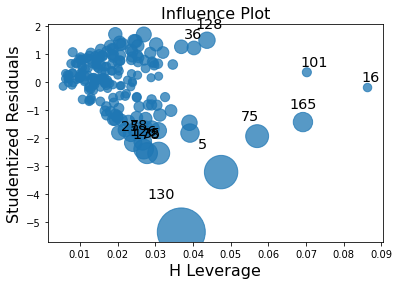

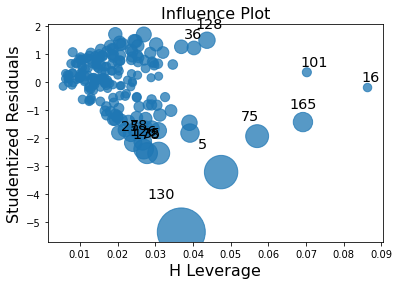

In [13]:
# Plot outliers and influence measures
lm.get_influence().plot_influence()

In [14]:
outliers = [130, 5, 75, 165, 27, 128]
adv.iloc[outliers].join(lm_sf.iloc[outliers]).round(2)

,TV,Radio,Newspaper,Sales,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
130,0.7,39.6,8.7,1.6,10.43,0.32,9.79,11.07,7.04,13.81
5,8.7,48.9,75.0,7.2,12.48,0.37,11.75,13.20,9.08,15.88
75,16.9,43.7,89.4,8.7,11.86,0.40,11.06,12.65,8.44,15.28
165,234.5,3.4,84.8,11.9,14.22,0.44,13.35,15.10,10.79,17.66
27,240.1,16.7,22.9,15.9,17.05,0.19,16.68,17.42,13.71,20.40
128,220.3,49.0,3.2,24.7,22.26,0.35,21.56,22.95,18.86,25.65


### Linear Model with the Best Fit
Taking into account the results of regression of *Sales* onto three variables we can remove the predictor *Newspaper*.

In [15]:
lm = smf.ols('Sales ~ TV + Radio', data=adv).fit()
print(lm.summary(), '\n')
get_RSE(lm)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           4.83e-98
Time:                        06:49:30   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

This model is simpler and has a little bit better performance. To identify potential problems with a linear model, let us see the residual plot. As we have two predictors, we plot the residuals verus the predicted (fitted) values.

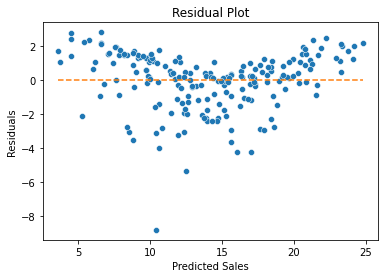

In [16]:
from sklearn.linear_model import LinearRegression
# Prepare training data
X = adv.loc[:, ['TV', 'Radio']]
y = adv.Sales

# Train the model
model = LinearRegression()
model.fit(X, y)

# Estimate the target
y_hat = pd.Series(model.predict(X), X.index)

# Plot residuals versus predicted values
sns.scatterplot(x=y_hat, y=lm.resid)
plt.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), colors='tab:orange', linestyle='dashed')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot');

The residul plot shows some pattern, so there is a problem with linear regession model assumptions (mainly additivity and linearity). Let's try to add interaction term between out two predictors.

### Model with Interaction Term

In [17]:
adv['TV_Radio'] = adv.TV * adv.Radio
lm = smf.ols('Sales ~ TV + Radio + TV_Radio', data=adv).fit()
print(lm.summary(), '\n')
get_RSE(lm)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          6.68e-146
Time:                        06:49:31   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

Adding an interaction term significantly increased the accuracy of the model. The $R^2$ incrased from $0.897$ to $0.968$ and $\text{RSE}$ decreased from $12\%$ to just $7\%$. 

In [18]:
# Calculate relative change of explained variability
print(f'The {(0.968-0.897)/(1-0.897):.1%} of the variability in `Sales` that remains after fitting\nthe additive model has been explained by the interaction term.')

The 68.9% of the variability in `Sales` that remains after fitting
the additive model has been explained by the interaction term.


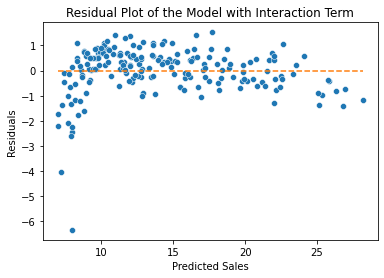

In [19]:
# Prepare training data
X = adv.loc[:, ['TV', 'Radio', 'TV_Radio']]
y = adv.Sales

# Train the model
model = LinearRegression()
model.fit(X, y)

# Estimate the target
y_hat = pd.Series(model.predict(X), X.index)

# Plot residuals versus predicted values
sns.scatterplot(x=y_hat, y=lm.resid)
plt.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), colors='tab:orange', linestyle='dashed')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot of the Model with Interaction Term');

The last redidual plot still suggest some non-linearity in model but considering the $R^2 = 0.968$ our model with an interaction term is a good extimate of the true relationship between *Sales* and advertising budget for *TV* and *Radio* media.

### Multicollinearity Check (VIF)

In [20]:
# Import dependencies
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import statsmodels as sm
# Calculate a Variance Inflation Factor (VIF)
vif = pd.DataFrame()
X = sm.tools.add_constant(adv.iloc[:, [0,1,2]])
vif['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif['Predictors'] = X.columns
vif.round(3)

,VIF,Predictors
0,6.849,const
1,1.005,TV
2,1.145,Radio
3,1.145,Newspaper


The VIFs for all three predictors is less then 5, suggesting no evidence for collinearity.

## Draw Conclusions
###  (1) Is there a relationship between advertising budget and sales?

> This question can be answered by fitting a multiple regression model of *Sales* onto *TV*, *Radio*, and *Newspaper*, as in $(20)$ and testing the  hypothesis $H_0: \beta_{TV} = \beta_{Radio} = \beta_{Newspaper} = 0$. In Section 3.2.2,  we showed that the $F$-statistic can be used to determine whether or not we should reject this null hypothesis. In this case the $p$-value corresponding to the $F$-statistic in Table 3.6 is very low, indicating  clear evidence of a relationship between advertising and sales.


###  (2) How strong is the relationship between advertising budget and sales?

> We discussed two measures of model accuracy in Section 3.1.3. First,  the RSE estimates the standard deviation of the response from the  population regression line. For the Advertising data, the RSE is 1.69  units while the mean value for the response is 14.022, indicating a  percentage error of roughly 12%. Second, the R2 statistic records  the percentage of variability in the response that is explained by  the predictors. The predictors explain almost 90% of the variance in  sales. The RSE and R2 statistics are displayed in Table 3.6. 

###  (3) Which media are associated with sales?

> To answer this question, we can examine the p-values associated with  each predictor’s t-statistic (Section 3.1.2). In the multiple linear regression displayed in Table 3.4, the p-values for TV and radio are low,  but the p-value for newspaper is not. This suggests that only TV and  radio are related to sales. In Chapter 6 we explore this question in  greater detail.

###  (4) How large is the association between each medium and sales?

> We saw in Section 3.1.2 that the standard error of βˆ  j can be used to  construct confidence intervals for βj. For the Advertising data, we can use the results in Table 3.4 to compute the 95% confidence intervals for the coefficients in a multiple regression model using all three  media budgets as predictors. The confidence intervals are as follows:  (0.043, 0.049) for TV, (0.172, 0.206) for radio, and (−0.013, 0.011) for  newspaper. The confidence intervals for TV and radio are narrow and  far from zero, providing evidence that these media are related to  sales. But the interval for newspaper includes zero, indicating that  the variable is not statistically significant given the values of TV and  radio.  We saw in Section 3.3.3 that collinearity can result in very wide standard errors. Could collinearity be the reason that the confidence interval associated with newspaper is so wide? The VIF scores are 1.005,  1.145, and 1.145 for TV, radio, and newspaper, suggesting no evidence  of collinearity.  In order to assess the association of each medium individually on  sales, we can perform three separate simple linear regressions. Results are shown in Tables 3.1 and 3.3. There is evidence of an extremely strong association between TV and sales and between radio  and sales. There is evidence of a mild association between newspaper  and sales, when the values of TV and radio are ignored.

###  (5) How accurately can we predict future sales?

> The response can be predicted using (3.21). The accuracy associated with this estimate depends on whether we wish to predict an  individual response, Y = f(X) + , or the average response, f(X)  (Section 3.2.2). If the former, we use a prediction interval, and if the  latter, we use a confidence interval. Prediction intervals will always  be wider than confidence intervals because they account for the uncertainty associated with , the irreducible error.

###  (6) Is the relationship linear?

> In Section 3.3.3, we saw that residual plots can be used in order to  identify non-linearity. If the relationships are linear, then the residual  plots should display no pattern. In the case of the Advertising data,  we observe a non-linear effect in Figure 3.5, though this effect could  also be observed in a residual plot. In Section 3.3.2, we discussed the  inclusion of transformations of the predictors in the linear regression  model in order to accommodate non-linear relationships.

###  (7) Is there synergy among the advertising media?

> The standard linear regression model assumes an additive relationship between the predictors and the response. An additive model  is easy to interpret because the association between each predictor  and the response is unrelated to the values of the other predictors.  However, the additive assumption may be unrealistic for certain data sets. In Section 3.3.2, we showed how to include an interaction term  in the regression model in order to accommodate non-additive relationships. A small p-value associated with the interaction term indicates the presence of such relationships. Figure 3.5 suggested that the  Advertising data may not be additive. Including an interaction term  in the model results in a substantial increase in R2, from around 90%  to almost 97%.

## References
- [np.polyfit: transition guide](https://numpy.org/doc/stable/reference/routines.polynomials.html)
- [np.Polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html#numpy.polynomial.polynomial.Polynomial)